In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv("./Datasets/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.shape

(1025, 14)

In [13]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=32,random_state=42)

In [26]:
rf = RandomForestClassifier(n_estimators=10,random_state=42)

In [27]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [28]:
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)*100

100.0

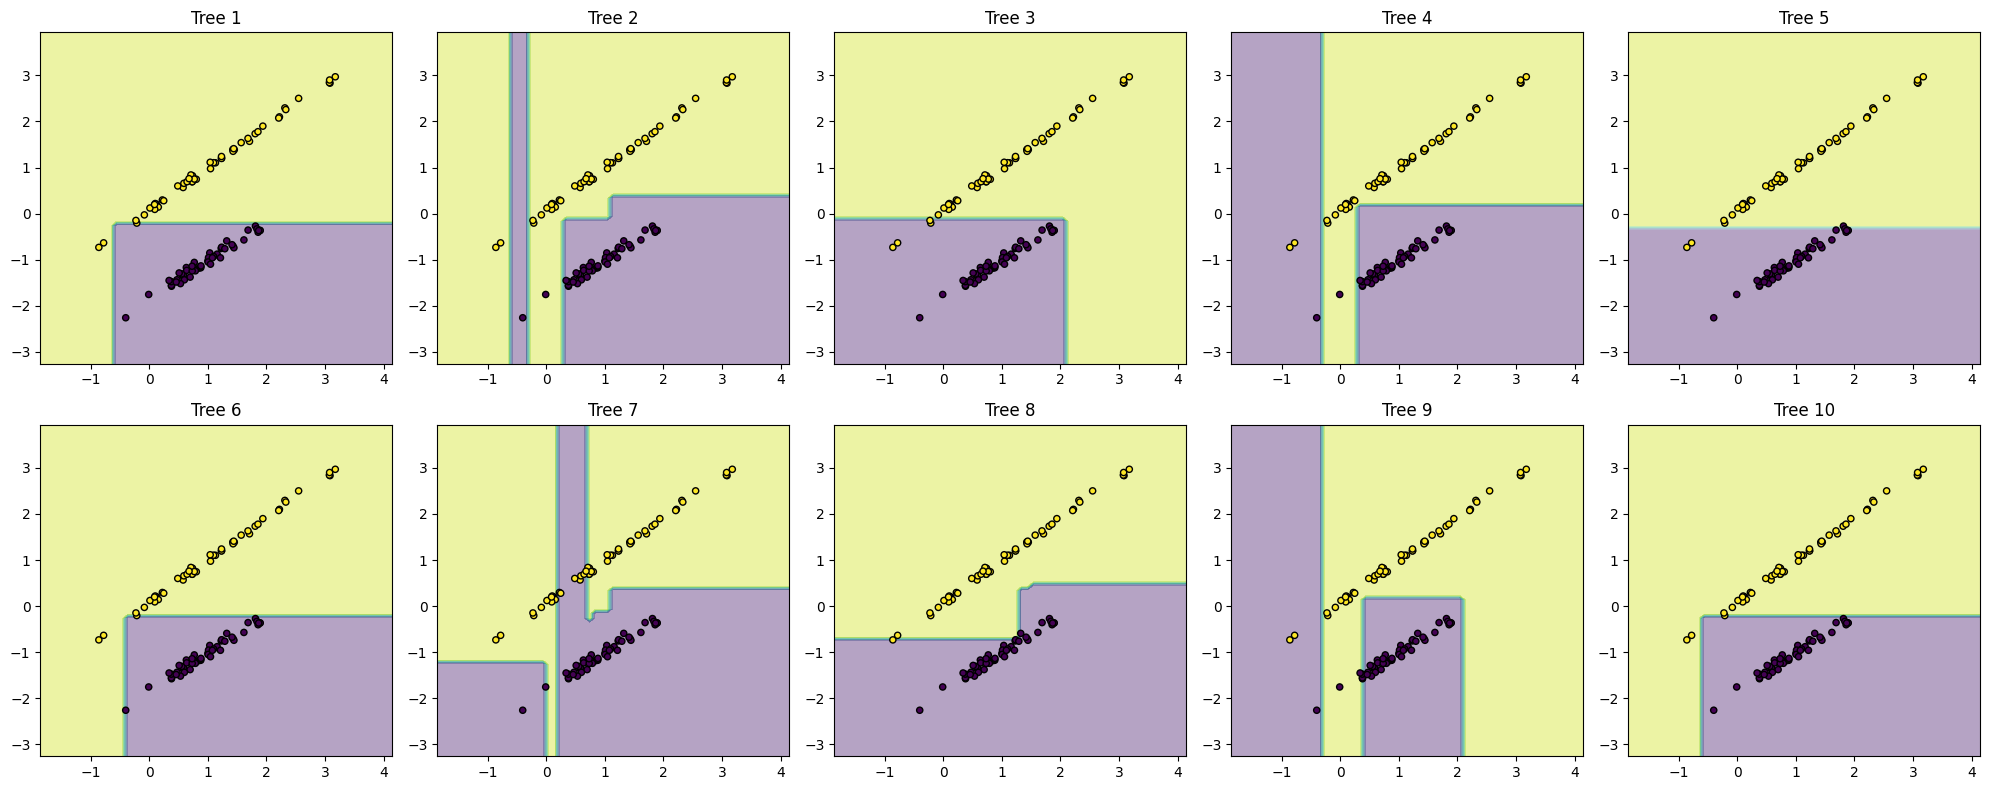

In [29]:
# Create a meshgrid for plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Plot decision regions
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

for i, ax in enumerate(axs.ravel()):
    if i < len(rf.estimators_):
        tree = rf.estimators_[i]
        Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.4)
        ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
        ax.set_title(f'Tree {i+1}')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()
